In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import keras
import h5py
import PIL
%matplotlib inline

/home/nahue/Escritorio/ML/MLvenv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Preprocessing (Genres)

## Loading the initial csv

In [2]:
ds_full = pd.read_csv('ds_full_reducido.csv')
ds_full = ds_full.drop(columns=['Unnamed: 0', 'ordering','isAdult','startYear', 'endYear', 'job', 'characters'])

['Unnamed: 0',
 'Unnamed: 0.1',
 'tconst',
 'titleType',
 'primaryTitle',
 'originalTitle',
 'runtimeMinutes',
 'genres',
 'nconst',
 'category',
 'averageRating',
 'numVotes',
 'directors',
 'writers']

## We create a new dataframe with only tconst and genres. We remove duplicates

In [3]:
# cargo un nuevo dataframe solo con tconst y generos. Dropeo los datos duplicados
df_genre = ds_full[['tconst','genres']]
df_genre = df_genre.drop_duplicates()
df_genre

tconst                   genres
0       tt0002130  Adventure,Drama,Fantasy
10      tt0002423          Biography,Drama
20      tt0002844              Crime,Drama
30      tt0003014                    Drama
40      tt0003037              Crime,Drama
50      tt0003165      Crime,Drama,Mystery
59      tt0003419     Drama,Fantasy,Horror
69      tt0003643       Crime,Drama,Horror
79      tt0003740  Adventure,Drama,History
89      tt0003772            Drama,Fantasy
99      tt0003930              Crime,Drama
108     tt0003952              Crime,Drama
118     tt0004026                   Horror
124     tt0004181                    Drama
134     tt0004465   Action,Adventure,Drama
144     tt0004635     Action,Drama,Romance
152     tt0004707                   Comedy
162     tt0004972        Drama,History,War
172     tt0005060                    Drama
181     tt0005078                    Drama
190     tt0005339                    Drama
200     tt0005916                    Drama
209     tt0005960    Biography,Crime,Drama
218     tt0006206   Action,Adventure,Crime
228     tt0006333  Action,Adventure,Sci-Fi
237     tt0006509                    Drama
247     tt0006731              Crime,Drama
257     tt0006780          Romance,Western
266     tt0006826     Comedy,Drama,Romance
276     tt0006864            Drama,History
...           ...                      ...
373654  tt7700730            Drama,Romance
373664  tt7705790                  Romance
373673  tt7711342             Action,Drama
373682  tt7717440                Animation
373692  tt7748244            Action,Comedy
373702  tt7748426                   Comedy
373711  tt7752454            Action,Comedy
373721  tt7762982                      War
373731  tt7763020          Biography,Drama
373741  tt7784604     Drama,Horror,Mystery
373751  tt7794524                   Action
373761  tt7797658          Sci-Fi,Thriller
373771  tt7843946                    Drama
373781  tt7853242           Comedy,Romance
373791  tt7862330    Comedy,Drama,Thriller
373801  tt7871636                   Comedy
373811  tt7895904          Horror,Thriller
373821  tt7912470           Drama,Thriller
373827  tt7923374           Comedy,Fantasy
373837  tt7953814      Action,Comedy,Crime
373847  tt7959216           Drama,Thriller
373857  tt7983794              Documentary
373867  tt7983844              Documentary
373877  tt8005366                   Comedy
373887  tt8024712             Comedy,Drama
373896  tt8080556              Documentary
373906  tt8081062              Documentary
373908  tt8106570              Documentary
373917  tt8335880                Biography
373927  tt8362516                    Drama

[38154 rows x 2 columns]

## Here is where magic happens!
## We generate a new dataframe from the previous (df_genre), splitting all the genres from each movie into one row each. We also set the tconst as an index.


In [4]:
cleaned = df_genre.set_index('tconst').genres.str.split(',', expand=True).stack()
cleaned

tconst      
tt0002130  0      Adventure
           1          Drama
           2        Fantasy
tt0002423  0      Biography
           1          Drama
tt0002844  0          Crime
           1          Drama
tt0003014  0          Drama
tt0003037  0          Crime
           1          Drama
tt0003165  0          Crime
           1          Drama
           2        Mystery
tt0003419  0          Drama
           1        Fantasy
           2         Horror
tt0003643  0          Crime
           1          Drama
           2         Horror
tt0003740  0      Adventure
           1          Drama
           2        History
tt0003772  0          Drama
           1        Fantasy
tt0003930  0          Crime
           1          Drama
tt0003952  0          Crime
           1          Drama
tt0004026  0         Horror
tt0004181  0          Drama
                   ...     
tt7797658  0         Sci-Fi
           1       Thriller
tt7843946  0          Drama
tt7853242  0         Comedy
       

## We use the method get_dummies() to generate a 'One Hot Encoder' and then we join our both dataframes. Done!

In [5]:
# le hago un get_dummies y despues agrupo por el indice y VOILA tengo mi nuevo dataframe con la info que queria
df_dummies = pd.get_dummies(cleaned, prefix='g').groupby(level=0).sum()
# quito la columna g_N creada por este metodo que no tiene valores
df_dummies = df_dummies.drop(columns = 'g_\\N')
df_dummies

g_Action  g_Adult  g_Adventure  g_Animation  g_Biography  g_Comedy  \
tconst                                                                          
tt0002130         0        0            1            0            0         0   
tt0002423         0        0            0            0            1         0   
tt0002844         0        0            0            0            0         0   
tt0003014         0        0            0            0            0         0   
tt0003037         0        0            0            0            0         0   
tt0003165         0        0            0            0            0         0   
tt0003419         0        0            0            0            0         0   
tt0003643         0        0            0            0            0         0   
tt0003740         0        0            1            0            0         0   
tt0003772         0        0            0            0            0         0   
tt0003930         0        0            0            0            0         0   
tt0003952         0        0            0            0            0         0   
tt0004026         0        0            0            0            0         0   
tt0004181         0        0            0            0            0         0   
tt0004465         1        0            1            0            0         0   
tt0004635         1        0            0            0            0         0   
tt0004707         0        0            0            0            0         1   
tt0004972         0        0            0            0            0         0   
tt0005060         0        0            0            0            0         0   
tt0005078         0        0            0            0            0         0   
tt0005339         0        0            0            0            0         0   
tt0005916         0        0            0            0            0         0   
tt0005960         0        0            0            0            1         0   
tt0006206         1        0            1            0            0         0   
tt0006333         1        0            1            0            0         0   
tt0006509         0        0            0            0            0         0   
tt0006731         0        0            0            0            0         0   
tt0006780         0        0            0            0            0         0   
tt0006826         0        0            0            0            0         1   
tt0006864         0        0            0            0            0         0   
...             ...      ...          ...          ...          ...       ...   
tt7700730         0        0            0            0            0         0   
tt7705790         0        0            0            0            0         0   
tt7711342         1        0            0            0            0         0   
tt7717440         0        0            0            1            0         0   
tt7748244         1        0            0            0            0         1   
tt7748426         0        0            0            0            0         1   
tt7752454         1        0            0            0            0         1   
tt7762982         0        0            0            0            0         0   
tt7763020         0        0            0            0            1         0   
tt7784604         0        0            0            0            0         0   
tt7794524         1        0            0            0            0         0   
tt7797658         0        0            0            0            0         0   
tt7843946         0        0            0            0            0         0   
tt7853242         0        0            0            0            0         1   
tt7862330         0        0            0            0            0         1   
tt7871636         0        0            0            0            0         1   
tt7895904         0        0            0 

In [6]:
# mergeo joineo o concateno ambos y listo ahora solo queda dropear la columna genres que es innecesaria y listo\
ds_full_tconst = ds_full.set_index('tconst')
result = ds_full_tconst.join(df_dummies)

result = result.drop(columns = 'genres')
result

Unnamed: 0  Unnamed: 0.1 titleType  \
tconst                                          
tt0002130           0          4678     movie   
tt0002130           1          4679     movie   
tt0002130           2          4680     movie   
tt0002130           3          4681     movie   
tt0002130           4          4682     movie   
tt0002130           5          4683     movie   
tt0002130           6          4684     movie   
tt0002130           7          4685     movie   
tt0002130           8          4686     movie   
tt0002130           9          4687     movie   
tt0002423          10          5357     movie   
tt0002423          11          5358     movie   
tt0002423          12          5359     movie   
tt0002423          13          5360     movie   
tt0002423          14          5361     movie   
tt0002423          15          5362     movie   
tt0002423          16          5363     movie   
tt0002423          17          5364     movie   
tt0002423          18          5365     movie   
tt0002423          19          5366     movie   
tt0002844          20          6091     movie   
tt0002844          21          6092     movie   
tt0002844          22          6093     movie   
tt0002844          23          6094     movie   
tt0002844          24          6095     movie   
tt0002844          25          6096     movie   
tt0002844          26          6097     movie   
tt0002844          27          6098     movie   
tt0002844          28          6099     movie   
tt0002844          29          6100     movie   
...               ...           ...       ...   
tt8080556      373905       7003719     movie   
tt8081062      373906       7003730     movie   
tt8081062      373907       7003731     movie   
tt8106570      373908       7005811     movie   
tt8106570      373909       7005812     movie   
tt8106570      373910       7005813     movie   
tt8106570      373911       7005814     movie   
tt8106570      373912       7005815     movie   
tt8106570      373913       7005816     movie   
tt8106570      373914       7005817     movie   
tt8106570      373915       7005818     movie   
tt8106570      373916       7005819     movie   
tt8335880      373917       7020430     movie   
tt8335880      373918       7020431     movie   
tt8335880      373919       7020432     movie   
tt8335880      373920       7020433     movie   
tt8335880      373921       7020434     movie   
tt8335880      373922       7020435     movie   
tt8335880      373923       7020436     movie   
tt8335880      373924       7020437     movie   
tt8335880      373925       7020438     movie   
tt8335880      373926       7020439     movie   
tt8362516      373927       7021312     movie   
tt8362516      373928       7021313     movie   
tt8362516      373929       7021314     movie   
tt8362516      373930       7021315     movie   
tt8362516      373931       7021316     movie   
tt8362516      373932       7021317     movie   
tt8362516      373933       7021318     movie   
tt8362516      373934       7021319     movie   

                                        primaryTitle  \
tconst                                                 
tt0002130                            Dante's Inferno   
tt0002130                            Dante's Inferno   
tt0002130                            Dante's Inferno   
tt0002130                            Dante's Inferno   
tt0002130                            Dante's Inferno   
tt0002130                            Dante's Inferno   
tt0002130                            Dante's Inferno   
tt0002130                            Dante's Inferno   
tt0002130                            Dante's Inferno   
tt0002130                            Dante's Inferno   
tt0002423                             Madame DuBarry   
tt0002423                             Madame DuBarry   
tt0002423                             Madame DuBarry   
tt0002423                             Madame DuBarry   
tt0002423                  

In [7]:
# ademas mostramos la lista de todos los generos posibles para ahora graficar la distribucion de las pelicula
# en elos mismos
list(df_dummies)

['g_Action',
 'g_Adult',
 'g_Adventure',
 'g_Animation',
 'g_Biography',
 'g_Comedy',
 'g_Crime',
 'g_Documentary',
 'g_Drama',
 'g_Family',
 'g_Fantasy',
 'g_Film-Noir',
 'g_History',
 'g_Horror',
 'g_Music',
 'g_Musical',
 'g_Mystery',
 'g_News',
 'g_Romance',
 'g_Sci-Fi',
 'g_Sport',
 'g_Talk-Show',
 'g_Thriller',
 'g_War',
 'g_Western']

# Genre/Movies Graph

## From df_dummies we will make a graph to show the distribution of the movies according to their possibles genres. Remember that every movie can have more than one genre.

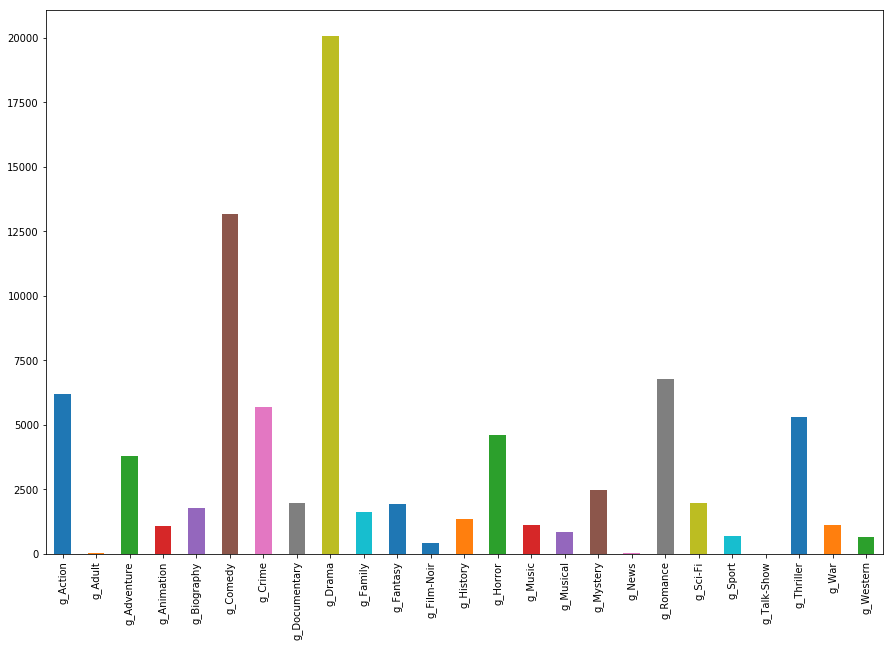

In [8]:

df_dummies.sum().plot(kind = 'bar', figsize= [15,10])


In [9]:
# ahora analizaremos la variable runtime minutes , capturamos la data en un nuevo data frame 
# quitamos los duplicados, pasamos la info de runtimeMinutes a numerica
# generamos el grafico
df_runtime = ds_full[['tconst','runtimeMinutes']]
df_runtime = df_runtime.drop_duplicates()
df_runtime = pd.to_numeric(df_runtime['runtimeMinutes'], errors='coerce')


In [10]:
df_runtime.groupby(pd.cut(df_runtime, np.arange(11,730,50))).count().plot.bar()

# Preprocessing 

### Variables to